## Clasificación usando Random Forest en Python

El código de este notebook en general es bastante estándar, dada la extensa cantidad de documentos en internet utilizando el dataset de `iris`, sin embargo, he tomado algunos pedazos de código de [este notebook](https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset) de Thiago Vieira en kaggle.

In [40]:
# En python, típicamente importamos todas las librerías qeu se vayan a usar en la primera parte del código
# Para esto necesitamos las siguientes librerías
import pandas as pd # manipulación de datos
import matplotlib.pyplot as plt # graficación
import seaborn as sns # más graficación
import datetime as dt # manejo de fechas
import numpy as np # para manejar arreglos de datos 

# librerías de modelado
from sklearn.model_selection import train_test_split # para hacer división entre train-test
from sklearn.ensemble import RandomForestClassifier # Modelo que vamos a utilizar
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay # utilizamos accuracy score y confusion_matrix para determinar la calidad del modelo
from sklearn.datasets import load_iris # iris dataset para nuestro ejemplo

### Obtención de los datos

In [3]:
# Cargamos los datos utilizando load_iris, ya que estamos usando un dataset de ejemplo
iris = load_iris()

# lo convertimos en un dataframe
iris = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

Columnas:

- **sepal length**: Longitud de sépalo
- **sepal width**: Anchura de sépalo
- **petal length**: Longitud de pétalo
- **petal width**: Anchura de pétalo
- **species**: especie (respuesta/target)
  - **0** : setosa
  - **1** : versicolor
  - **2** : virginica

Todas las longitudes y anchuras están en centímetros (cm)

### Limpieza/manipulación de datos

Este dataset no requiere limpieza de datos!

### Análisis exploratorio

Graficamos las 4 métricas de medición de las flores por especie

/home/dreth/anaconda3/envs/gobcon/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


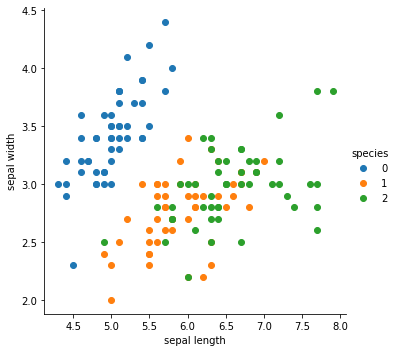

In [20]:
# longitud de sépalo vs anchura de sépalo por especie en un scatterplot
# los colores representan cada especie
sns.FacetGrid(iris,hue='species',size=5).map(plt.scatter,'sepal length','sepal width').add_legend()

/home/dreth/anaconda3/envs/gobcon/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


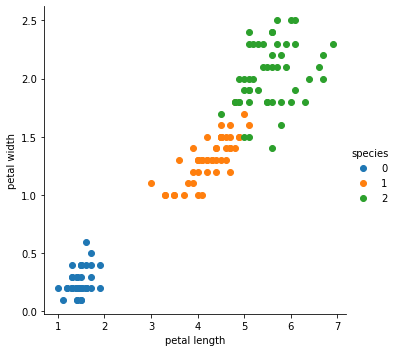

In [21]:
# longitud de pétalo vs anchura de pétalo por especie
# los colores representan cada especie
sns.FacetGrid(iris,hue='species',size=5).map(plt.scatter,'petal length','petal width').add_legend()

<AxesSubplot:xlabel='species', ylabel='petal length'>

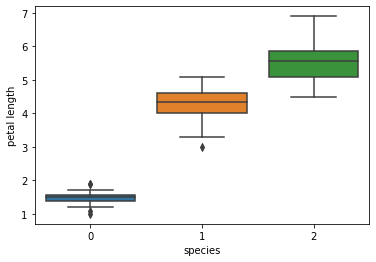

In [22]:
sns.boxplot(x='species',y='petal length',data=iris)

<AxesSubplot:xlabel='species', ylabel='petal width'>

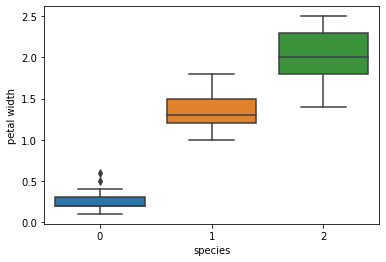

In [23]:
sns.boxplot(x='species',y='petal width',data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal length'>

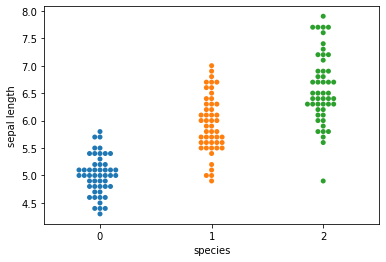

In [26]:
sns.swarmplot(x='species',y='sepal length',data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal width'>

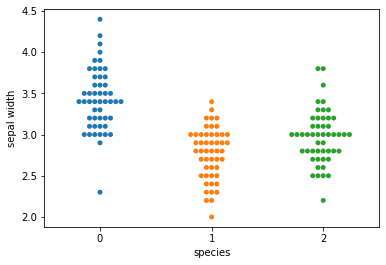

In [27]:
sns.swarmplot(x='species',y='sepal width',data=iris)

Claramente hay diferencias por especie en términos de longitud de pétalo y sépalo.

En particular las especies 1 y 2 tienen cierto overlapping en casi todas las métricas, y pudiera ser más difícil para los modelos distinguir entre ambas.

### Tratamiento/selección de variables

Dado que todas las variables son numéricas, no requieren ningun tratamiento particular

##### Separar variables para modelado en 'predictores' y 'respuesta'

In [28]:
# Predictores
pred = iris[[x for x in iris.columns if x != 'species']].values

# Respuesta
resp = iris['species'].values

Guardamos los nombres de las variables para utilizarlas luego

In [29]:
# Guardar nombres de los predictores en una variable
feature_names = [x for x in iris.columns if x != 'species']

# Guardar nombre de la respuesta en una variable
resp_name = 'species'

### Modelado

#### Train-test split

En el siguiente Train-test split nombramos las variables de la siguiente manera:

- **X_train**: predictores de la porción de entrenamiento

- **X_test**: predictores de la porción de prueba

- **y_train**: respuesta de la porción de entrenamiento

- **y_test**: respuesta de la porción de prueba

In [30]:
# Separamos la data en un train-test split
X_train, X_test, y_train, y_test = train_test_split(pred, resp, test_size = 0.3, random_state = 55)

Los parámetros de la función `train_test_split` que utilizamos son los siguientes:

- `*arrays`: En estos parámetros introducimos los predictores `pred` y respuesta `resp`, como fueron definidos anteriormente
- `test_size`: Representa la porción del dataset que se utilizará como prueba, en nuestro caso, utilizamos el 30% del dataset para pruebas, entonces `0.3`
- `random_state`: Es una variable que representa el `seed` de nuestra división aleatoria del dataset original, esto nos permite reproducir este train-test split en el futuro de manera idéntica.

### Entrenar el modelo

In [32]:
# Instanciamos el modelo y le asignamos un total de 1000 árboles de decisión
# el modelo promediará el resultado de los 1000 árboles
clf = RandomForestClassifier(n_estimators= 1000, random_state=55)

In [33]:
# Aplicamos el método fit para entrenar el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=55)

### Evaluación del modelo

In [35]:
# predecimos sobre el test set
pred_test = clf.predict(X_test)

# Calculamos el MAE
print(np.round(accuracy_score(y_test, pred_test), 4))

0.9556


Vemos que nuestro modelo predice con <span style="font-size:x-large;">~95.56%</span> de accuracy, <span style="color: green;">excelente</span>!

Sin embargo, podemos indagar más. 

Dónde tiende a equivocarse el modelo?

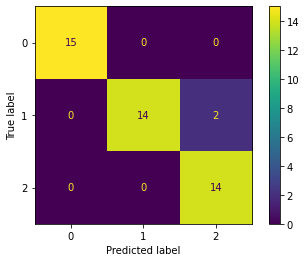

In [42]:
# Matriz de confusión
cm = confusion_matrix(y_test, pred_test)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

Vemos que el modelo predice con mucha seguridad para `setosa`, que fue la especie que observamos en el análisis exploratorio con mayor separación con las demás.

Sin embargo, en 2 instancias, especies de tipo `versicolor` fueron clasificadas incorrectamente como `virginica`. Confirmando nuevamente nuestra inferencia de que podría ser difícil para el modelo distinguir con seguridad entre estas dos especies.

De todas maneras, el resultado es bastante satisfactorio, pero vale saber con seguridad donde el modelo tiene menos fortaleza.

### Importancia de las variables

Podemos determinar a traves el objeto del modelo `clf` la importancia de cada variable.

In [46]:
importance = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)

Vemos que la variable que más permite distinguir entre grupos es la longitud de pétalo, seguida de la anchura de pétalo, ambas contribuyendo más del 87% de la variabilidad del modelo.

<AxesSubplot:>

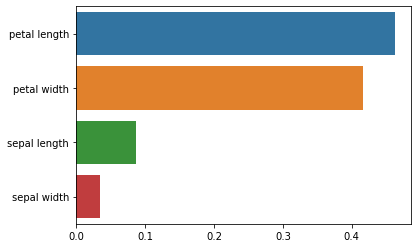

In [48]:
sns.barplot(x=importance, y=importance.index)

Si quisiéramos, pudiésemos eliminar la variable `sepal width` o incluso hasta `sepal length` si quisiéramos un modelo super sencillo. Podría hacerse esto al costo de un poco de accuracy, pero por el momento, yo consideraría esto aceptable.